In [2]:
# Import necessary libraries
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim import corpora, models


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

# Load the social media data set from a CSV file
data = pd.read_csv("Tweets.csv")

# Extract the location data from the tweets
locations = data['tweet_location']

# Remove any null or empty locations
locations = [location for location in locations if str(location) != 'nan' ]
print(locations[:5])


['Lets Play', 'San Francisco CA', 'Los Angeles', 'San Diego', 'Los Angeles']


In [5]:
# Determine the most common locations
unique_locations, counts = np.unique(locations, return_counts=True)

# This returns the sorted indices 
sorted_indices = np.argsort(-counts)
unique_locations = unique_locations[sorted_indices]
counts = counts[sorted_indices]
print(unique_locations)
# This basically sorts the location based on indices


['Boston, MA' 'New York, NY' 'Washington, DC' ... 'Mammoth Lakes '
 'Major metro area, USA' '명동서식 37.56638,126.984994']


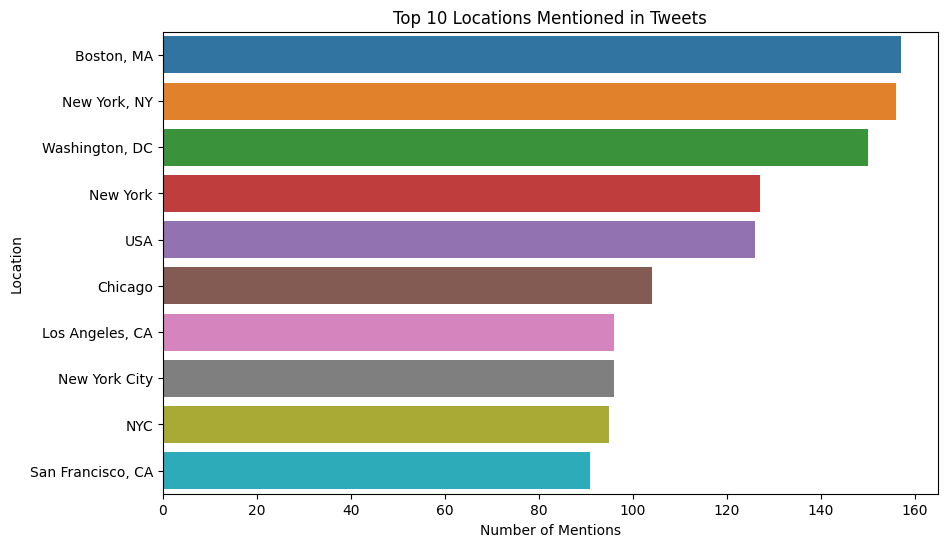

In [6]:

# Create a bar plot of the most common locations
plt.figure(figsize=(10,6))
sns.barplot(x=counts[:10], y=unique_locations[:10])
plt.title('Top 10 Locations Mentioned in Tweets')
plt.xlabel('Number of Mentions')
plt.ylabel('Location')
plt.show()

In [4]:
# Perform language detection and sentiment analysis for each tweet
stop_words = set(stopwords.words('english'))
sentiments = []
for tweet in data['text'][:1000]:
    try:
        lang = detect(tweet)
        if lang == 'en':
            text = ' '.join([word.lower() for word in word_tokenize(tweet) if word.lower() not in stop_words])
            polarity = TextBlob(text).sentiment.polarity
            sentiments.append(polarity)
        else:
            sentiments.append(None)
    except:
        sentiments.append(None)

print(data['text'][:5])
print(sentiments[:5])

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object
[0.0, 0.0, -0.390625, 0.0062500000000000056, -0.3499999999999999]


In [8]:
# Add the sentiments to the data as a new column
sentiments = np.array(sentiments)
sentiments_df = pd.DataFrame(sentiments, columns=['sentiment'])
data_df = pd.concat([data, sentiments_df], axis=1)


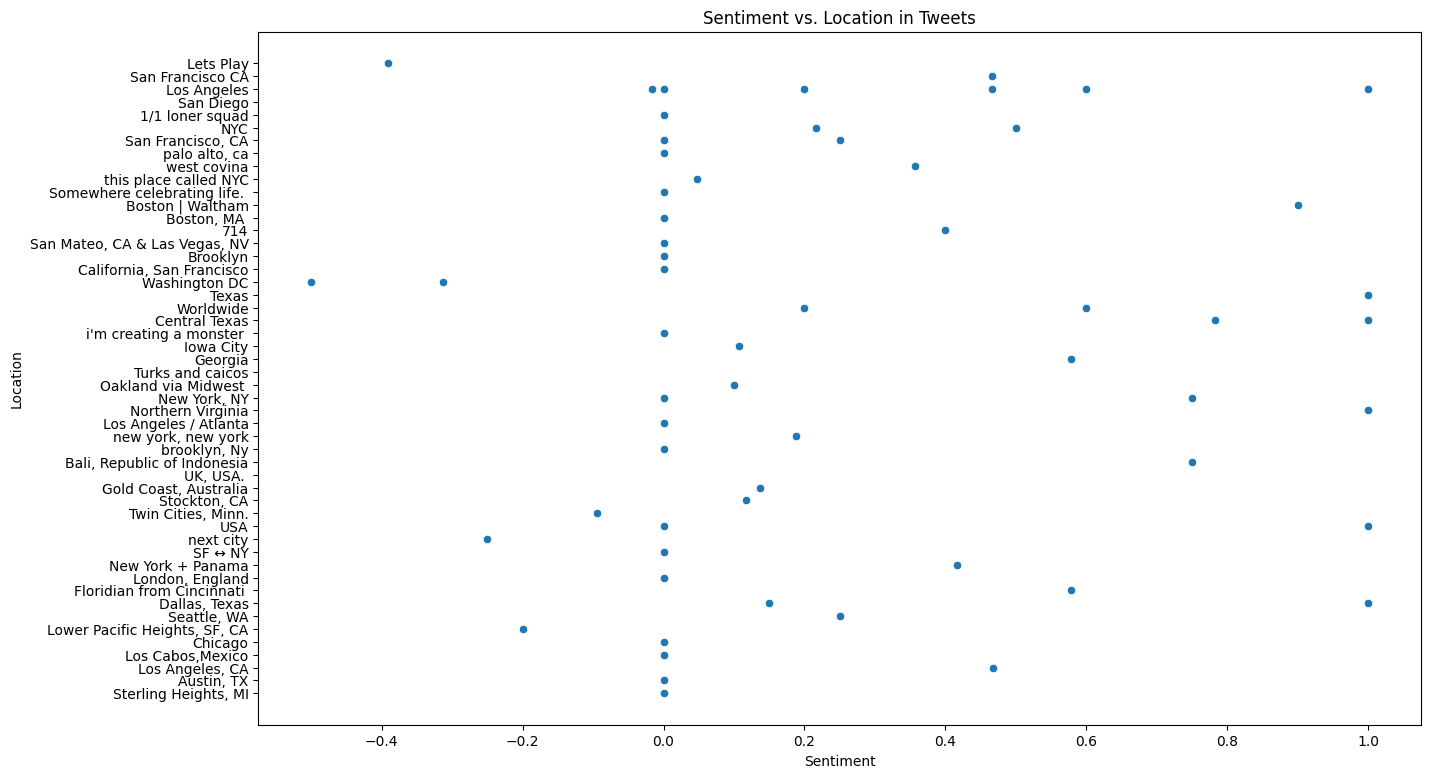

In [14]:
# Create a scatter plot of sentiment vs. location
plt.figure(figsize=(15,9))
sns.scatterplot(x=data_df['sentiment'][:100], y=data_df['tweet_location'][:100])
plt.title('Sentiment vs. Location in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Location')
plt.show()

['flight, united, americanair, thanks, usairways, southwestair, thank, jetblue, cancelled, help, service, just, flightled, hold, hours, customer, time, flights, need, delayed, hour, got, http, ve, dm, plane, late, phone, amp, today, great, guys, tomorrow, waiting, gate, don, trying, bag, airline, flighted, did, change, like, wait, know, minutes, sent, fly, worst, home, way, going, day, good, airport, yes, delay, virginamerica, make, weather, ll, really, flying, check, response, getting, agent, number, luggage, follow, told, want, bags, days, online, hrs, lost, email, ticket, people, problems, new, work, let, rebook, best, love, rebooked, experience, reservation, crew, book, travel, booked, morning, sure, right, awesome, baggage, aa']


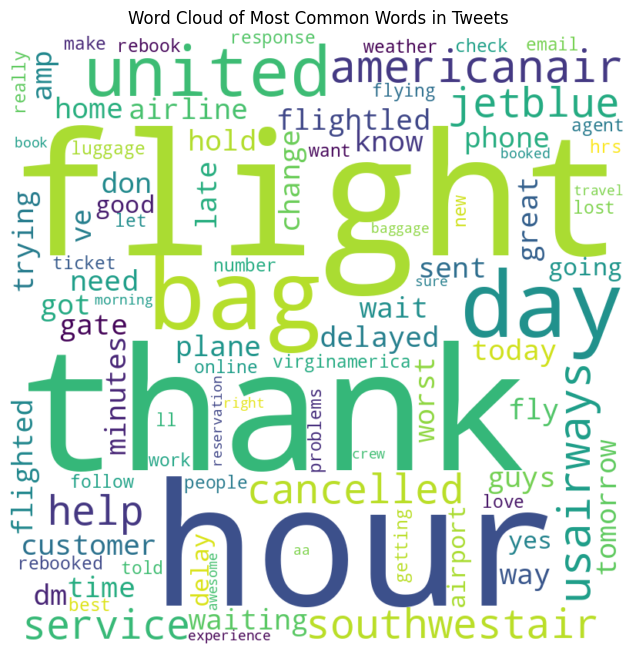

In [20]:
# This code mostly same like the one in practical1 so you can refer that 
# Create a word cloud of the most common words in the tweets
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_df['text'])
num_topics = 1
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)
topic_keywords = []
for topic_weights in nmf_model.components_:
    top_keywords = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic_weights.argsort()[:-101:-1]]
    topic_keywords.append(', '.join(top_keywords))
print(topic_keywords)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(topic_keywords[0])
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Tweets')
plt.show()